In [147]:
import numpy as np
import pandas as pd

In [148]:
data = pd.read_csv("data/pima-data.csv")

In [149]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [150]:
diab_map = {True:1,False:0}

In [151]:
data['diabetes'] = data['diabetes'].map(diab_map)

In [152]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [153]:
data.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [154]:
data['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [155]:
corr_mat = data.corr()

In [156]:
corr_ind = corr_mat.index

In [157]:
corr_ind

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

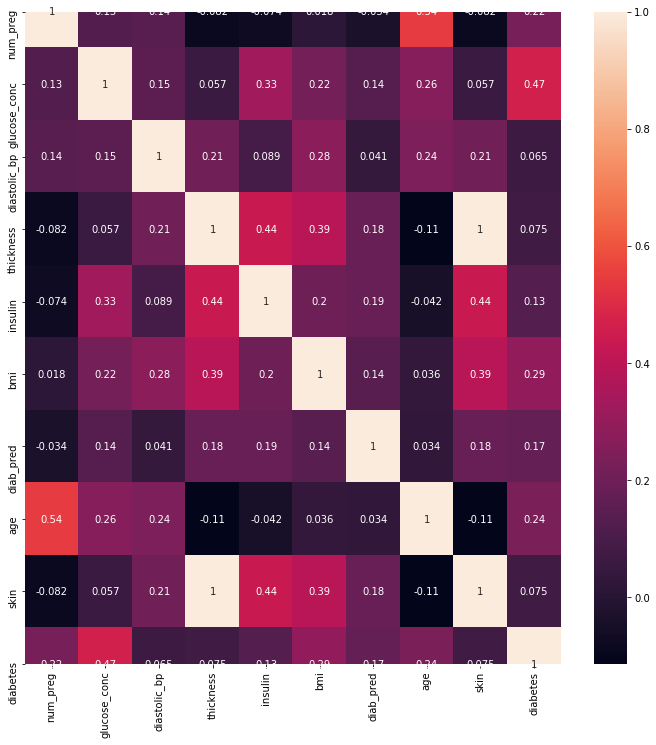

In [159]:
plt.figure(figsize=(12,12))
gg = sns.heatmap(data[corr_ind].corr(),annot=True)

In [160]:
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [161]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [162]:
for i in data.columns:
    print("Number of zeroes in {}::{}".format(i,len(data.loc[data[i]==0])))

Number of zeroes in num_preg::111
Number of zeroes in glucose_conc::5
Number of zeroes in diastolic_bp::35
Number of zeroes in thickness::227
Number of zeroes in insulin::374
Number of zeroes in bmi::11
Number of zeroes in diab_pred::0
Number of zeroes in age::0
Number of zeroes in skin::227
Number of zeroes in diabetes::500


In [163]:
feature_columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']
predicted_class = ['diabetes']

In [164]:
X = data[feature_columns].values
y = data[predicted_class].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [165]:
from sklearn.preprocessing import Imputer

fill_values = Imputer(missing_values=0,strategy='mean',axis=0)

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [166]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
model = RandomForestClassifier(random_state=10)

In [168]:
model.fit(X_train,y_train)

C:\Users\1024801\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\1024801\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [169]:
prediction = model.predict(X_test)

In [172]:
from sklearn.metrics import accuracy_score

score = accuracy_score(prediction,y_test)
print("Accuracy:: ", score)

Accuracy::  0.7186147186147186


In [174]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [175]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [176]:
classifier = xgboost.XGBClassifier()

In [177]:
grid_params = {
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[3,4,5,6,7,8],
    "min_child_weight":[1,3,5,7,9],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}

In [179]:
random_search = RandomizedSearchCV(classifier,param_distributions=grid_params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [180]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.0s finished
C:\Users\1024801\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\1024801\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_co...
                                           validate_parameters=None,
                                           verbosity=None),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distributions={'co

In [181]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [188]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                   colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
                                   importance_type='gain', interaction_constraints='',
                                   learning_rate=0.1, max_delta_step=0, max_depth=4,
                                   min_child_weight=1, monotone_constraints='()',
                                   n_estimators=100, n_jobs=0, num_parallel_tree=1,
                                   objective='binary:logistic', random_state=0, reg_alpha=0,
                                   reg_lambda=1, scale_pos_weight=1, subsample=1,
                                   tree_method='exact', validate_parameters=1, verbosity=None)

In [189]:
classifier.fit(X_train,y_train)

C:\Users\1024801\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\1024801\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [190]:
pred = classifier.predict(X_test)

In [191]:
score = accuracy_score(pred,y_test)

In [192]:
print("Accuracy of xgboost::",score)

Accuracy of xgboost:: 0.7316017316017316


In [193]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,X_train,y_train, cv=10)

C:\Users\1024801\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\1024801\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [194]:
score

array([0.74545455, 0.85185185, 0.83333333, 0.7962963 , 0.64814815,
       0.72222222, 0.88679245, 0.66037736, 0.77358491, 0.79245283])

In [195]:
score.mean()

0.7710513944476209